In [1]:
import pandas as pd
from sklearn.decomposition import IncrementalPCA

### Get estimated mean and variance

In [ ]:
years = ['2015', '2016', '2017', '2018', '2019', '2020']
generate_path = './../../generated/'
file_prefix_r = 'quotes-'
file_suffix_r = '_with_language_feats.csv'
selected_feats = [',_per_sentence', 'sign_per_token', 'approx_word_count', 'token_count', 'adj_per_word', 'verb_per_word', 'base_ratio', 'pres_ratio', 'past_ratio', 'pronoun_per_word', 'sentiment']

ipca = IncrementalPCA(n_components = len(selected_feats), batch_size = 40000)

samples = []

# get a sample of the df from each chunk from each year
for year in years:
    print("Year: " + str(year))
    # read the file from year and filter away features that are not selected
    file_name_r = file_prefix_r + year + file_suffix_r
    df_quotes_chunks = pd.read_csv(generate_path + file_name_r, chunksize = 40000, low_memory = False)

    for i, df_chunk in enumerate(df_quotes_chunks):
        # remove header duplicates
        chunk_clean = df_chunk[selected_feats][df_chunk[',_per_sentence'] != ',_per_sentence']

        # get sample and append it to samples
        sample = chunk_clean.sample(40)
        samples.append(sample)

        if i % 50 == 0:
            print("Chunk: " + str(i))


In [110]:
sample = pd.concat(samples)
mean = sample.astype('float32').mean(axis = 0)
std = sample.astype('float32').std(axis = 0)

In [118]:
mean

,_per_sentence        1.115390
sign_per_token        0.095745
approx_word_count    25.646566
token_count          28.183037
adj_per_word          0.074317
verb_per_word         0.199622
base_ratio           -0.454758
pres_ratio            0.000202
past_ratio           -0.508842
pronoun_per_word      0.070084
sentiment             0.071492
dtype: float32

In [119]:
std

,_per_sentence        1.097464
sign_per_token        0.050890
approx_word_count    19.901587
token_count          21.732134
adj_per_word          0.069059
verb_per_word         0.084899
base_ratio            0.518655
pres_ratio            0.605501
past_ratio            0.561781
pronoun_per_word      0.067149
sentiment             0.193451
dtype: float32

### PCA with selected features

In [ ]:
years = ['2015', '2016', '2017', '2018', '2019', '2020']
generate_path = './../../generated/'
file_prefix_r = 'quotes-'
file_suffix_r = '_with_language_feats.csv'
selected_feats = [',_per_sentence', 'sign_per_token', 'approx_word_count', 'token_count', 'adj_per_word', 'verb_per_word', 'base_ratio', 'pres_ratio', 'past_ratio', 'pronoun_per_word', 'sentiment']

ipca = IncrementalPCA(n_components = len(selected_feats), batch_size = 40000)

for year in years:
    print("Year: " + str(year))
    # read the file from year and filer away features that are not selected
    file_name_r = file_prefix_r + year + file_suffix_r
    df_quotes_chunks = pd.read_csv(generate_path + file_name_r, chunksize = 40000, low_memory = False)
    for i, df_chunk in enumerate(df_quotes_chunks):
        # remove header duplicates
        chunk_clean = df_chunk[selected_feats][df_chunk[',_per_sentence'] != ',_per_sentence'].astype('float32') 

        chunk_normalized = (chunk_clean - mean) / std

        ipca.partial_fit(chunk_normalized.to_numpy())
        
        if i % 50 == 0:
            print("Chunk: " + str(i))


In [112]:
ipca.explained_variance_ratio_

array([1.96128465e-01, 1.54213999e-01, 1.45818469e-01, 1.25947570e-01,
       1.07583140e-01, 9.38589713e-02, 6.73786869e-02, 5.57829677e-02,
       5.08207614e-02, 2.39212863e-03, 7.48403331e-05])

In [115]:
# print the feature vectors of the first pc:s which together explains more than 80 % of the variance
pca_vec = ipca.components_[:6]
pca_vec

array([[ 0.16322071, -0.16037459,  0.68651836,  0.68500483, -0.06235486,
        -0.01982455,  0.01508621, -0.02168431, -0.03542211, -0.0158648 ,
         0.02479012],
       [ 0.10754169,  0.16998624,  0.00840813,  0.01753098, -0.01893818,
         0.20861024, -0.38168505,  0.71419096, -0.47260621,  0.17047691,
         0.08434057],
       [ 0.00573833,  0.14040149,  0.0078027 ,  0.01624478, -0.4782865 ,
         0.57595974, -0.04559526, -0.2317974 ,  0.20573761,  0.56396381,
        -0.05700889],
       [ 0.43579715,  0.44033182,  0.01446721,  0.03712011,  0.19672604,
        -0.15676008, -0.51291129, -0.02656271,  0.53193477, -0.04033241,
        -0.0544224 ],
       [ 0.5208053 ,  0.50553517, -0.03462619, -0.00886885,  0.02741195,
        -0.05982393,  0.54575999, -0.14540945, -0.32726085,  0.07674205,
         0.18868279],
       [-0.20573428, -0.03107947,  0.02672149,  0.02418464,  0.31194925,
         0.03721081, -0.06154975, -0.07155325,  0.1327286 ,  0.24132893,
         0.878

### Plot the sample datapoints after dim reduction using the first two principal components

In [68]:
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
%matplotlib inline

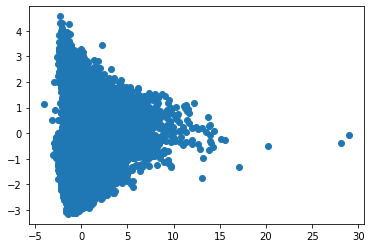

In [117]:
# chunk_clean = df_chunk[selected_feats][df_chunk[',_per_sentence'] != ',_per_sentence'].astype('float32')
sample_normalized = (sample.astype('float32') - mean) / std
v = sample_normalized.to_numpy() @ pca_vec.T
scatter(v[:,0], v[:,1])
plt.show()
